In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

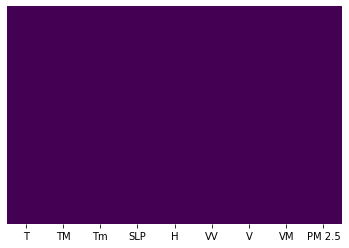

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False


In [8]:
y.isnull().sum()

0

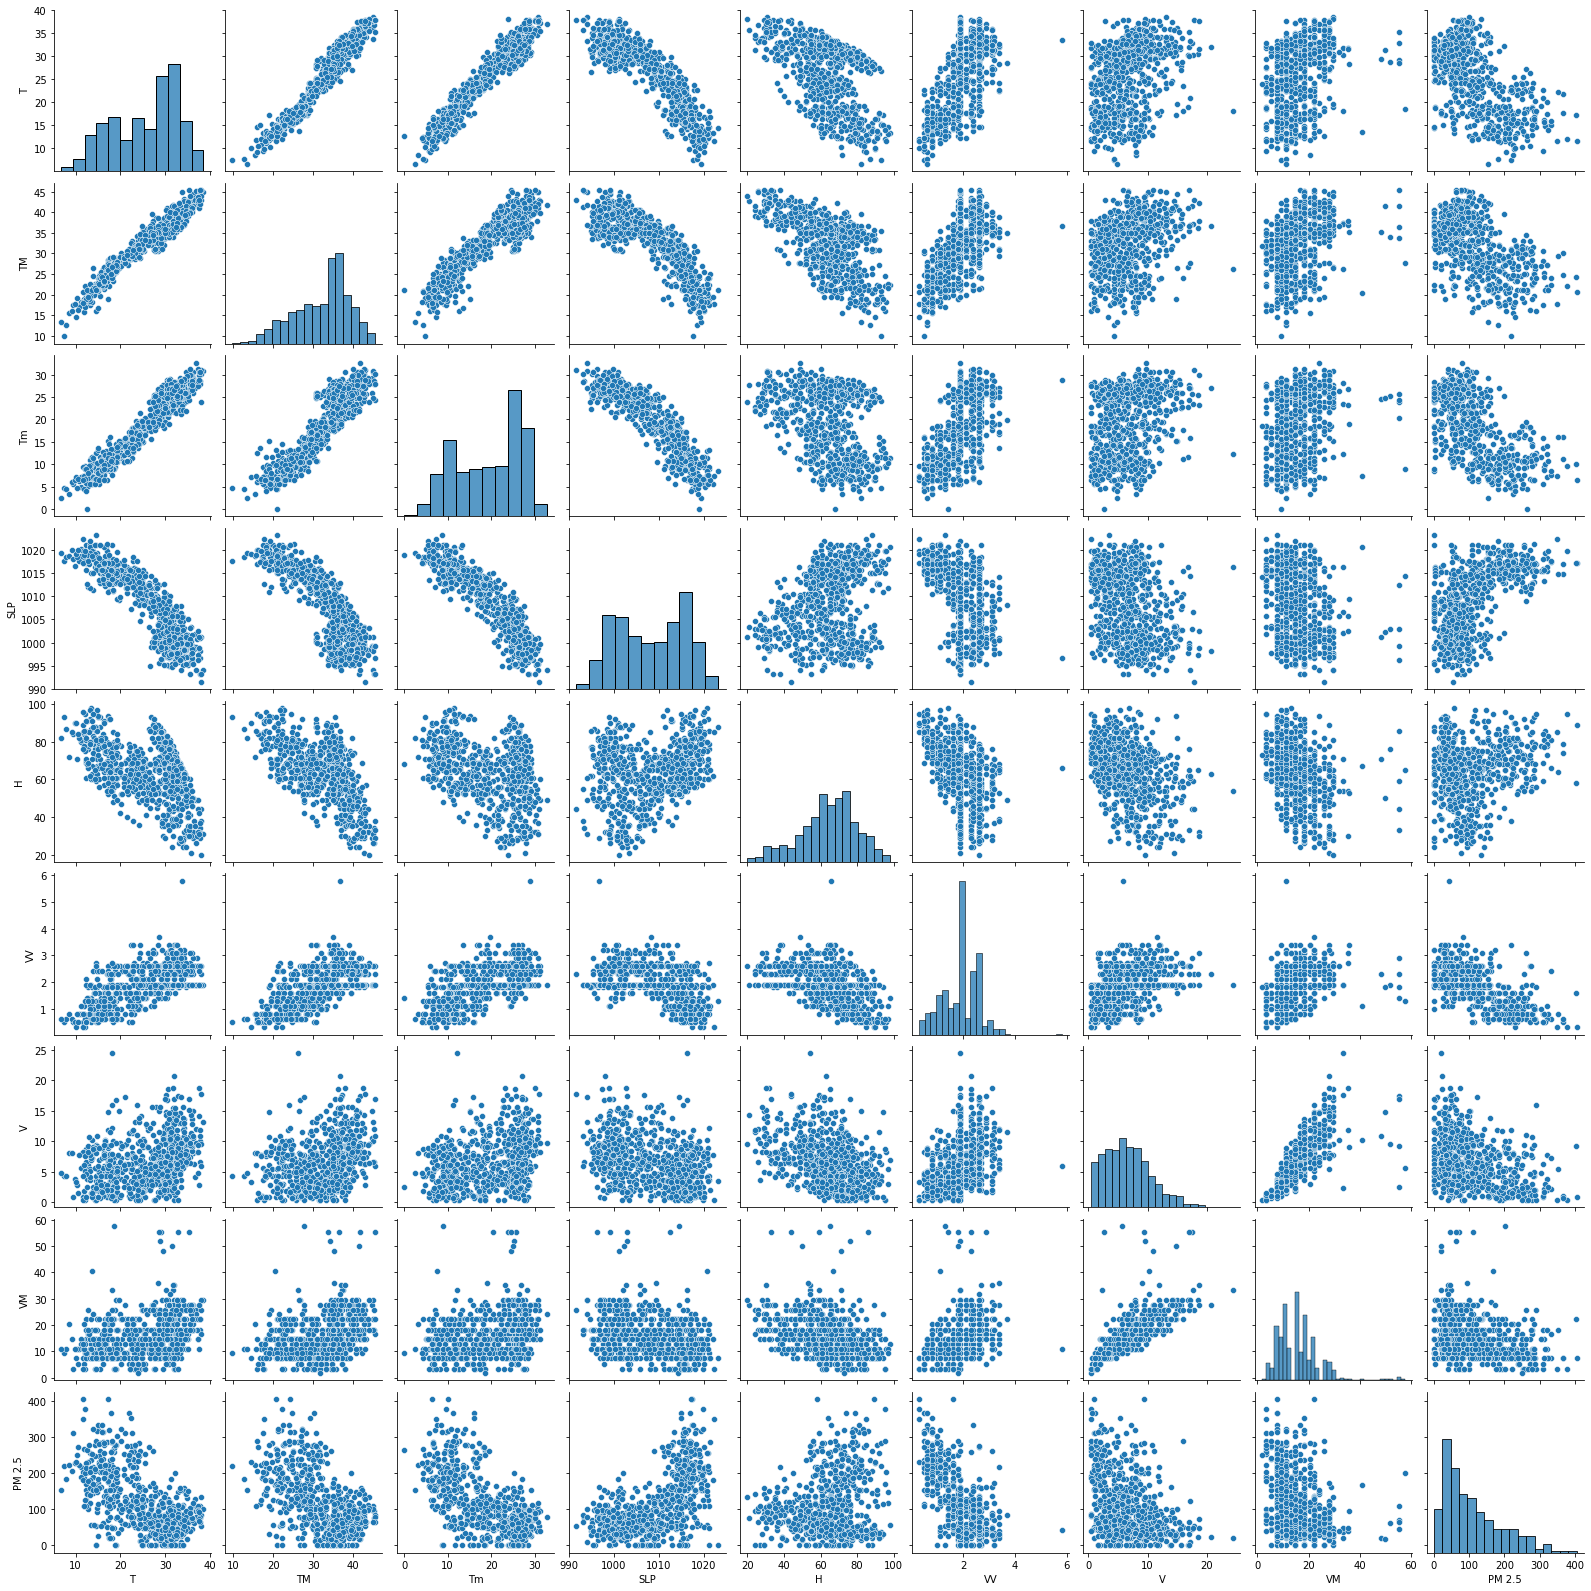

In [9]:
sns.pairplot(df)


In [10]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000



### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

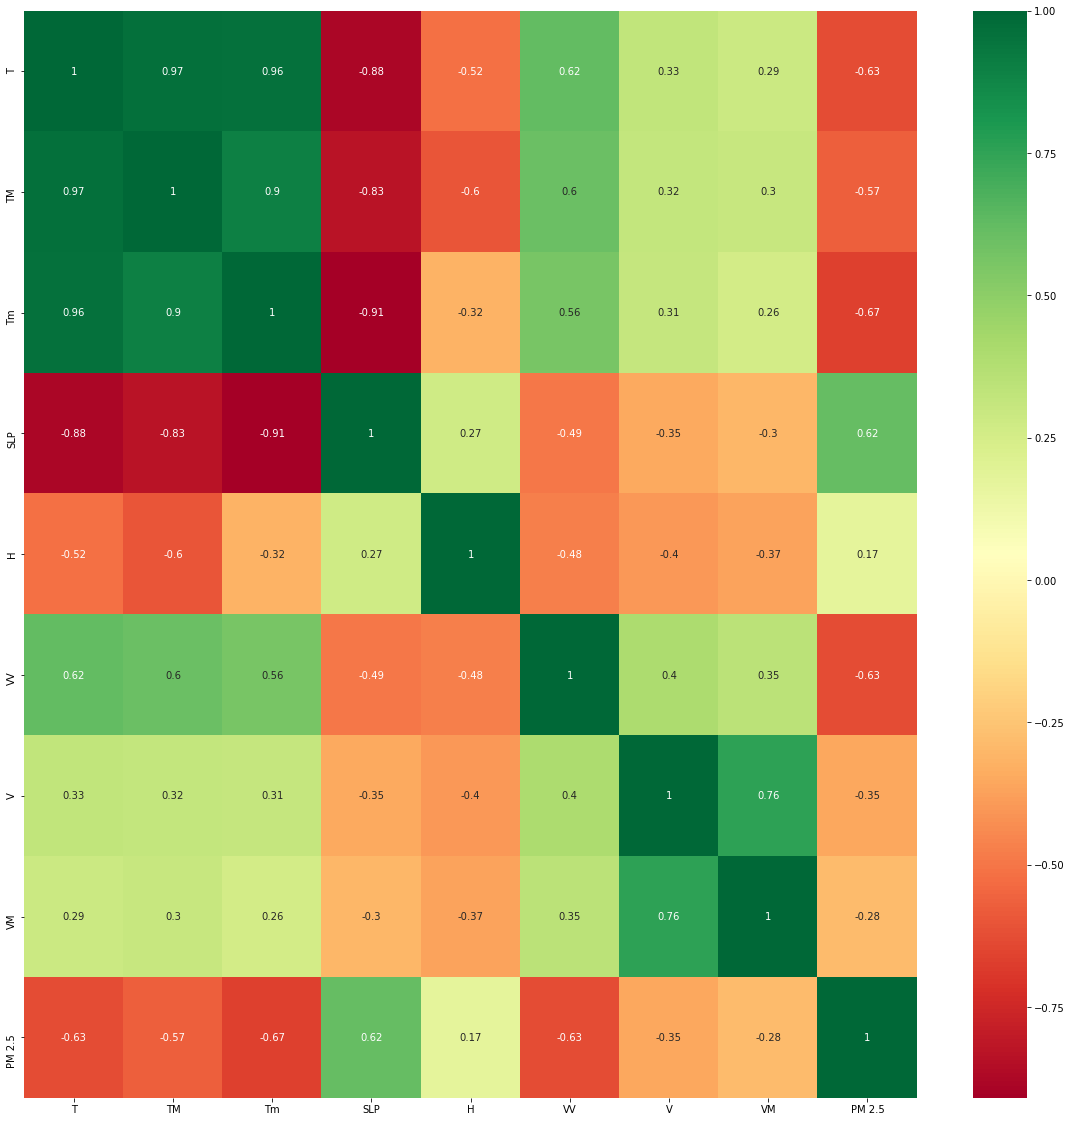

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [15]:
print(model.feature_importances_)

[0.16421413 0.08277348 0.19188319 0.12504414 0.0841989  0.25866658
 0.05392635 0.03929324]


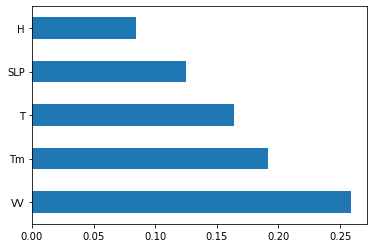

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

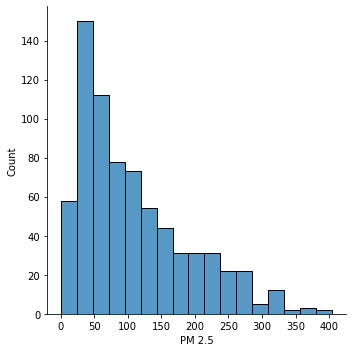

In [17]:
# Linear Regression
sns.displot(y)

In [18]:

### Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9519470914646594


In [22]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.6344341052960307


In [23]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [24]:
score.mean()

0.5018486863374385

In [25]:
prediction=regressor.predict(X_test)

C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

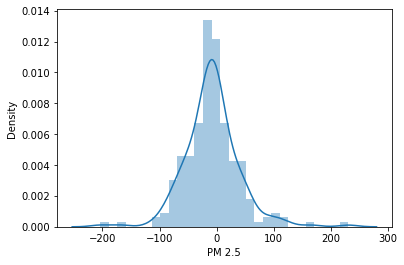

In [26]:
sns.distplot(y_test-prediction)

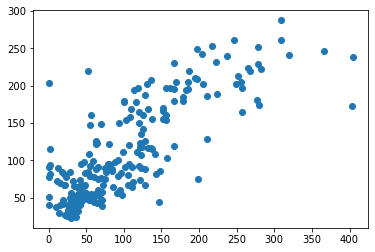

In [27]:
plt.scatter(y_test,prediction)

### Hyperparameter Tuning DEcision Tree Regressor¶

In [28]:
 #RandomForestRegressor() ##

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
 RandomForestRegressor() ##

RandomForestRegressor()

In [31]:
## Randomized Search Cv

# number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features ot cnsider at every plot
max_feature=['auto','sqrt']
# maxium number of levels in tree
max_depth=[int(x) for x in np.linspace(56,30,num=6)]
# max_depth.append(None)
#minimum number of sample required to split a node
min_samples_split=[2,4,5,10,15,100]
## Minimum number of samples required at each leaf node
min_samples_leaf=1,

In [32]:
## Create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_feature,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [56, 50, 45, 40, 35, 30], 'min_samples_split': [2, 4, 5, 10, 15, 100], 'min_samples_leaf': (1,)}


In [33]:
## use the random grid to search for best hyperparameters
# first creat the basemodel to tune
rf=RandomForestRegressor()

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
#Random search of parameters, using 3 fold cross validation,
#search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [39]:
from sklearn import metrics

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34.388115867579906
MSE: 2386.4703988216247
RMSE: 48.85151378229363


In [41]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.8s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimat

[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100; total time=   0.9s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100; total time=   0.8s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100; total time=   0.9s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100; total time=   0.8s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features

[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   0.3s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   0.2s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   0.2s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100; total time=   0.8s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100; total time=   0.8s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1100; total time=   0.8s
[CV] END max_depth=50, max_featu

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   0.4s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   0.4s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   0.4s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   0.4s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   0.4s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END max_depth=45, max_fea

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   0.9s
[CV] END max_depth=50, max_features

[CV] END max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.6s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.7s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.7s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.7s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_fea

[CV] END max_depth=56, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=56, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   0.8s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=40

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.6s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.6s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.6s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.6s
[CV] END max_depth=56, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END max_depth=56, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END max_depth=56, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END max_depth=56, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END max_depth=56, max_features=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [56, 50, 45, 40, 35, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': (1,),
                                        'min_samples_split': [2, 4, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 56}

In [43]:
rf_random.best_score_

-2575.3430730133377

In [44]:
predictions=rf_random.predict(X_test)

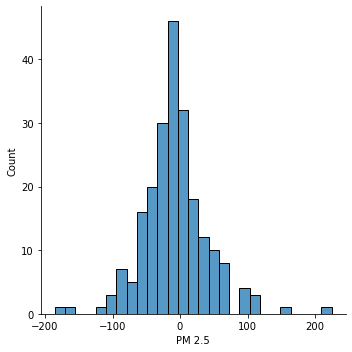

In [45]:
sns.displot(y_test-predictions)

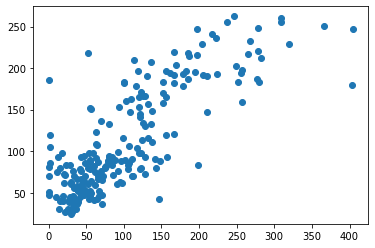

In [46]:
plt.scatter(y_test,predictions)


### Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [47]:
from sklearn import metrics

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 34.85508751342741
MSE: 2358.769467374032
RMSE: 48.567164497981885


In [49]:
import pickle

In [50]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)